In [1]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

Using TensorFlow backend.


In [4]:
class_names = ['NOODLES', 'RICE', 'BREAD']

In [7]:
width = 96
height = 96

In [8]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.jpg')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [12]:
images_type_0 = load_images('C:/Users/user/Downloads/food/images_type_0')
images_type_1 = load_images('C:/Users/user/Downloads/food/images_type_1')
images_type_2 = load_images('C:/Users/user/Downloads/food/images_type_2')

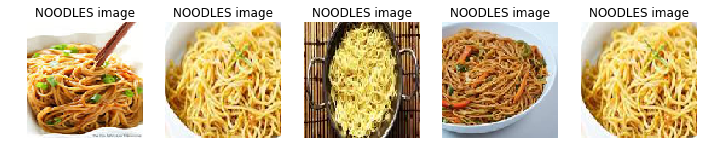

In [15]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_0))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

In [16]:
X_type_0 = np.array(images_type_0)
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)

print(X_type_0.shape)
print(X_type_1.shape)
print(X_type_2.shape)

(5, 96, 96, 3)
(5, 96, 96, 3)
(5, 96, 96, 3)


In [18]:
# one big array containing ALL the images:
X = np.concatenate((X_type_0, X_type_1, X_type_2), axis=0)

In [20]:
X = X / 255.

X.shape

(15, 96, 96, 3)

In [22]:
from keras.utils import to_categorical

y_type_0 = [0 for item in enumerate(X_type_0)]
y_type_1 = [1 for item in enumerate(X_type_1)]
y_type_2 = [2 for item in enumerate(X_type_2)]

y = np.concatenate((y_type_0, y_type_1, y_type_2), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(15, 3)


In [23]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [24]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

W0207 09:34:41.123284 14192 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [25]:
epochs = 30

In [26]:
model.fit(X, y, epochs=epochs)

Epoch 1/30
15/15 [==============================] - 2s 117ms/step - loss: 1.1134 - acc: 0.3333
Epoch 2/30
15/15 [==============================] - 0s 31ms/step - loss: 1.8405 - acc: 0.3333
Epoch 3/30
15/15 [==============================] - 0s 30ms/step - loss: 5.4335 - acc: 0.4000
Epoch 4/30
15/15 [==============================] - 0s 31ms/step - loss: 5.4527 - acc: 0.5333
Epoch 5/30
15/15 [==============================] - 0s 31ms/step - loss: 4.8181 - acc: 0.6000
Epoch 6/30
15/15 [==============================] - 0s 31ms/step - loss: 3.2424 - acc: 0.6000
Epoch 7/30
15/15 [==============================] - 0s 29ms/step - loss: 0.7361 - acc: 0.6667
Epoch 8/30
15/15 [==============================] - 0s 31ms/step - loss: 1.4674 - acc: 0.4667
Epoch 9/30
15/15 [==============================] - 1s 36ms/step - loss: 1.3470 - acc: 0.4000
Epoch 10/30
15/15 [==============================] - 0s 32ms/step - loss: 0.2955 - acc: 0.8667
Epoch 11/30
15/15 [==============================] - 0s 27

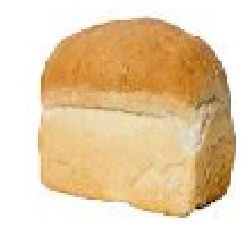

The type predicted is: BREAD


In [27]:
type_2 = preprocessing.image.load_img('C:/Users/user/Downloads/images.jpg',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.axis("off")
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [29]:
model.save('food_cnn_model.h5')